# 0. Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import pandas as pd
import plotly.express as px
import seaborn as sns
import math as m

# 1. Data Loading

In [ ]:
!unzip /content/mushrooms.zip
df = pd.read_csv("./data/mushrooms.csv")

unzip:  cannot find or open /content/mushrooms.zip, /content/mushrooms.zip.zip or /content/mushrooms.zip.ZIP.


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

# 2. EDA & Resampling

<Axes: >

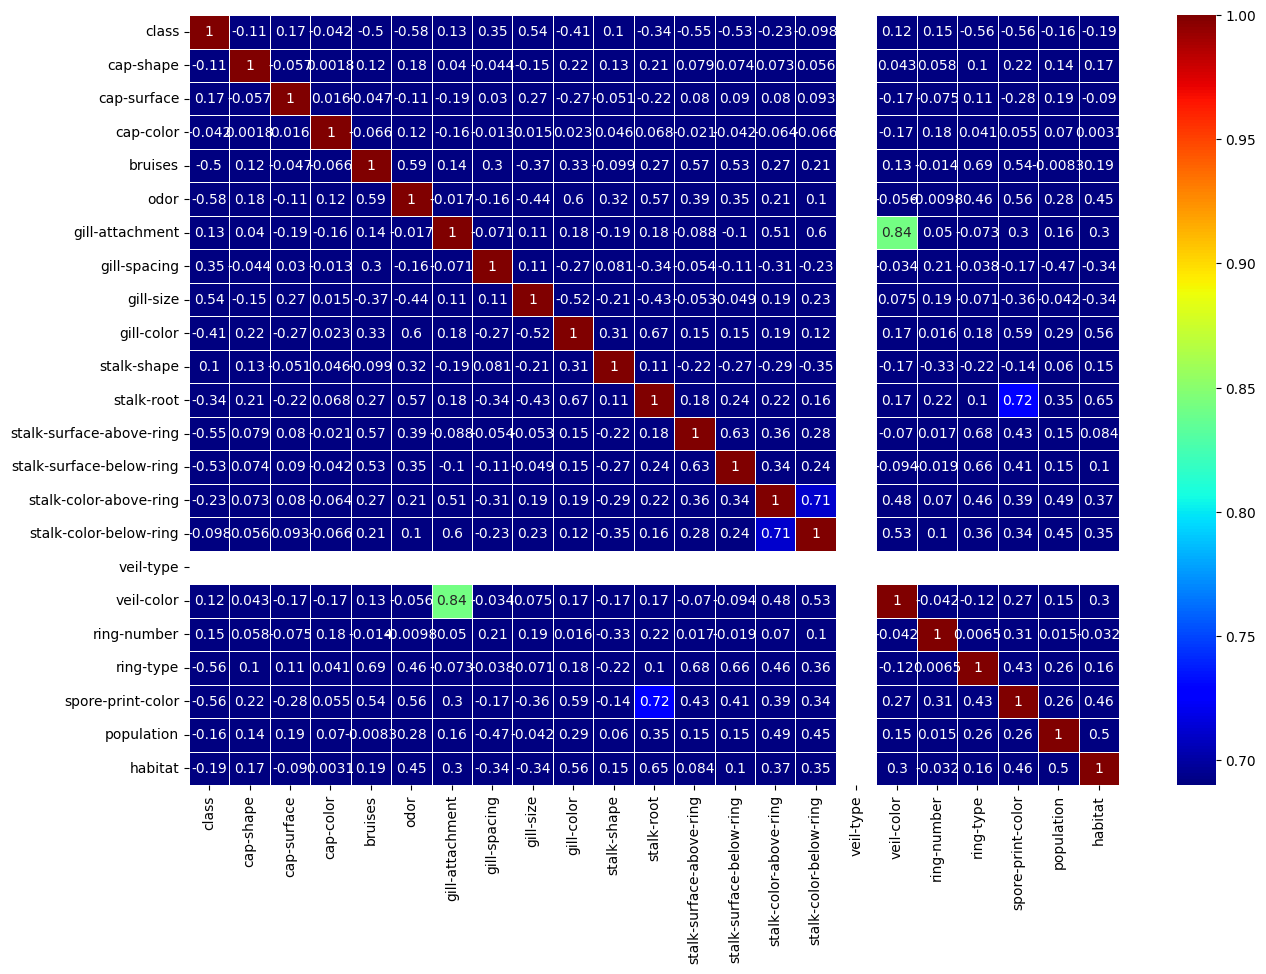

In [ ]:
df_f = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_f, annot=True, linewidths=.5, ax=ax,cmap="jet", vmin=0.69)

In [ ]:
# Removing stalk-color-below-ring and spore-print-color attributes as the have high correlation with the other attributes
df = df.drop(["stalk-color-below-ring", "stalk-root", "veil-type", "veil-color", "stalk-surface-below-ring"], axis=1)

<Axes: >

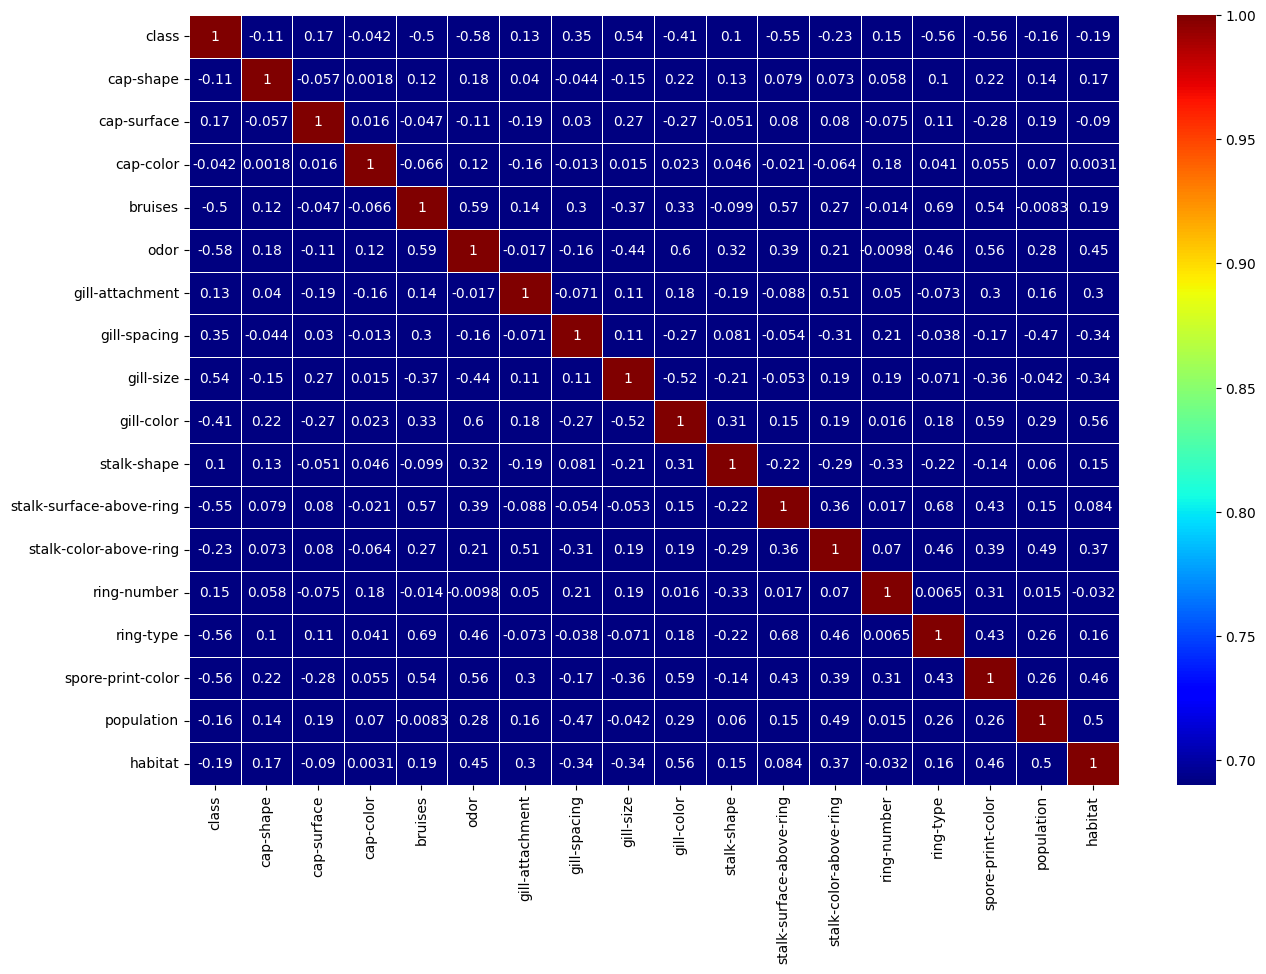

In [ ]:
# Checking the correlation heatmap
df_f = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_f, annot=True, linewidths=.5, ax=ax,cmap="jet", vmin=0.69)

In [ ]:
df_valid = df_f[np.abs(df_f["class"]) > 0.40]
df = df[df_valid.index]

In [ ]:
df.head()

,class,bruises,odor,gill-size,gill-color,stalk-surface-above-ring,ring-type,spore-print-color
0,p,t,p,n,k,s,p,k
1,e,t,a,b,k,s,p,n
2,e,t,l,b,n,s,p,n
3,p,t,p,n,n,s,p,k
4,e,f,n,b,k,s,e,n


## 2.1 Validating the distribution of `class`

<Axes: xlabel='class', ylabel='count'>

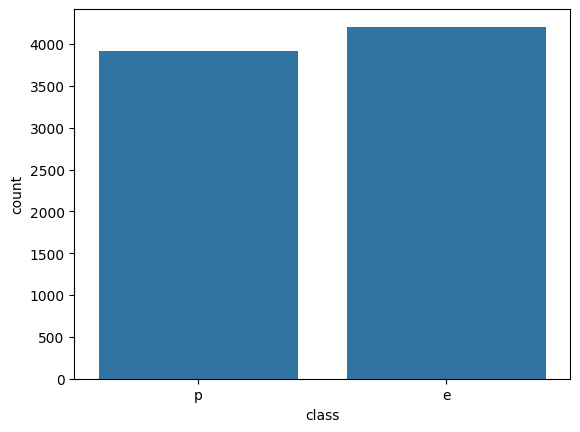

In [ ]:
sns.countplot(df, x="class")

## 2.2 Validating the distribution of `odor`

* Alter the distribution by replicating the "low-frquency" `odor`

### 2.2.1 Check distribution

In [ ]:
df_g = df.groupby(["odor", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="odor", y="count", color="class", title="Odor and Class dist")
fig.show()
del df_g

### 2.2.2 Resample the low frequnecy classes

In [ ]:
df_n = df[df["odor"] == "n"]
df_n_p = pd.concat([df_n[df_n["class"] == "p"]]*10)
len(df_n_p)

1200

### 2.2.3 Check the distribution of the `cap-shape` attribute and the `class` attribute

In [ ]:
df_resampled = pd.concat([df, df_n_p])
del df_n_p, df_n

In [ ]:
df_g = df_resampled.groupby(["odor", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="odor", y="count", color="class", title="Odor and Class dist")
fig.show()
del df_g

<Axes: xlabel='class', ylabel='count'>

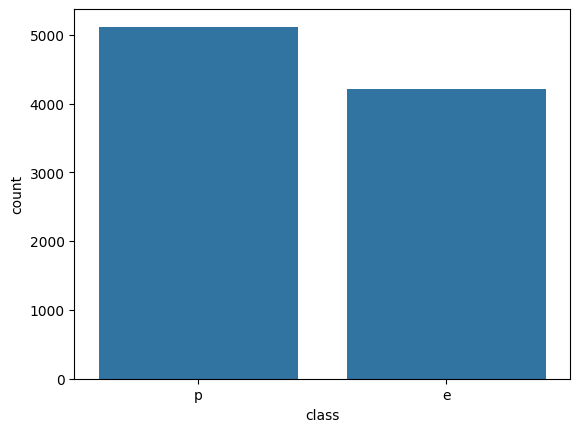

In [ ]:
sns.countplot(df_resampled, x="class")

In [ ]:
df = df_resampled
del df_resampled

## 2.3 Validating the distribution of `bruises`

In [ ]:
df_g = df.groupby(["bruises", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="bruises", y="count", color="class", title="bruises and Class dist")
fig.show()
del df_g

## 2.4 Validating the distribution of `gill-color`

### 2.4.1 Check distribution

In [ ]:
df_g = df.groupby(["gill-color", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="gill-color", y="count", color="class", title="gill-color and Class dist")
fig.show()
del df_g

### 2.4.2 Resample the categories `y`, `e` & `o`

In [ ]:
df_y = df[df["gill-color"] == "y"]
df_e = df[df["gill-color"] == "e"]
df_o = df[df["gill-color"] == "o"]

df_y = pd.concat([df_y]*5)
df_e = pd.concat([df_e]*5)
df_o = pd.concat([df_o]*8)

df_concat = pd.concat([df_y, df_e, df_o])
del df_y, df_e, df_o

In [ ]:
df_resampled = pd.concat([df, df_concat])

### 2.4.3 Check the distribution and add to dataframe

In [ ]:
df_g = df_resampled.groupby(["gill-color", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="gill-color", y="count", color="class", title="gill-color and Class dist")
fig.show()
del df_g

<Axes: xlabel='class', ylabel='count'>

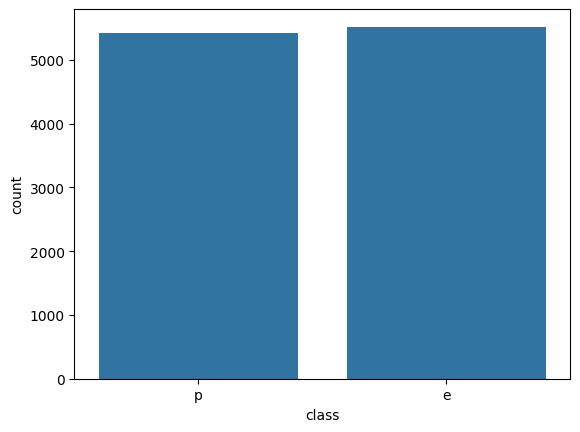

In [ ]:
sns.countplot(df_resampled, x="class")

In [ ]:
df = df_resampled
del df_resampled

## 2.5 Validating distribution of `gill-size	`

In [ ]:
df_g = df.groupby(["gill-size", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="gill-size", y="count", color="class", title="gill-size and Class dist")
fig.show()
del df_g

## 2.6 Validating distribution of `stalk-surface-above-ring`

### 2.6.1 Check the distribution

In [ ]:
df_g = df.groupby(["stalk-surface-above-ring", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="stalk-surface-above-ring", y="count", color="class", title="stalk-surface-above-ring and Class dist")
fig.show()
del df_g

### 2.6.2 Duplicate class `y` and `f`

In [ ]:
df_y = df[df["stalk-surface-above-ring"] == "y"]
df_f = df[df["stalk-surface-above-ring"] == "f"]

df_y = pd.concat([df_y]*5)
df_f = pd.concat([df_f]*5)

df_concat = pd.concat([df_y, df_f])

In [ ]:
df_resampled = pd.concat([df, df_concat])

### 2.6.3 Check distribution and merge

In [ ]:
df_g = df_resampled.groupby(["stalk-surface-above-ring", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="stalk-surface-above-ring", y="count", color="class", title="stalk-surface-above-ring and Class dist")
fig.show()
del df_g

<Axes: xlabel='class', ylabel='count'>

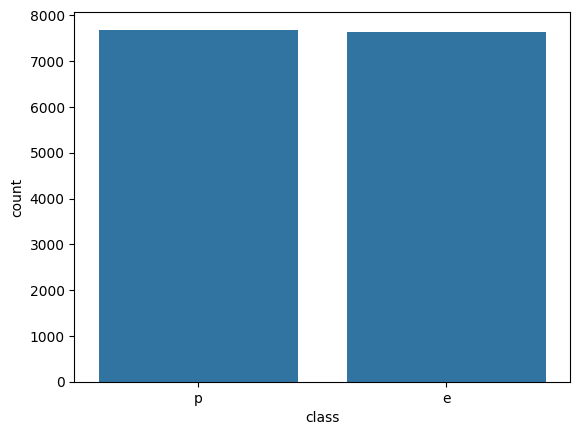

In [ ]:
sns.countplot(df_resampled, x="class")

In [ ]:
df = df_resampled
del df_resampled

## 2.7 Validating distribtion of `ring-type`

### 2.7.1 Check distribution

In [ ]:
df_g = df.groupby(["ring-type", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="ring-type", y="count", color="class", title="ring-type and Class dist")
fig.show()
del df_g

### 2.7.2 Resample the type `f` & `n`

In [ ]:
df_f = df[df["ring-type"] == "f"]
df_n = df[df["ring-type"] == "n"]

df_f = pd.concat([df_f]*20)
df_n = pd.concat([df_n]*10)

df_concat = pd.concat([df_f, df_n])
del df_f, df_n

In [ ]:
df_resampled = pd.concat([df, df_concat])
del df_concat

### 2.7.3 Check new distribution and merge

In [ ]:
df_g = df_resampled.groupby(["ring-type", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="ring-type", y="count", color="class", title="ring-type and Class dist")
fig.show()
del df_g

<Axes: xlabel='class', ylabel='count'>

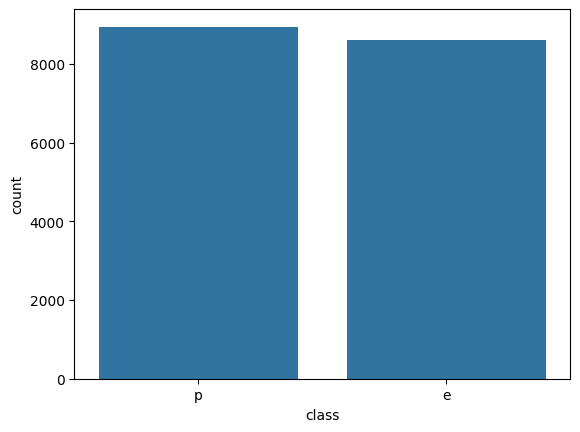

In [ ]:
sns.countplot(df_resampled, x="class")

In [ ]:
df = df_resampled
del df_resampled

## 2.8 Validating distribtion of `spore-print-color`


In [ ]:
df_g = df.groupby(["spore-print-color", "class"]).size().reset_index(name="count")
fig = px.bar(df_g, x="spore-print-color", y="count", color="class", title="spore-print-color and Class dist")
fig.show()
del df_g

# 3. Data Transformation

In [ ]:
# final data shape
df.shape

(17546, 8)

In [ ]:
# Transforming classes
df["class"] = df["class"].apply(lambda x : 1 if x == "p" else 0)

## 3.1 Onehot encoding categorical variables

In [ ]:
df_onehot = pd.get_dummies(df, columns=[ 'bruises', 'odor', 'gill-size', 'gill-color',
                            'stalk-surface-above-ring', 'ring-type', 'spore-print-color'], dtype=float)

In [ ]:
df_onehot.head()

,class,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,...,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 3.2 Splitting data into X & Y

In [ ]:
X_df = df_onehot.drop(columns="class")
Y_df = df_onehot["class"]

## 3.3 Splitting the data into train test split

In [ ]:
train_test_boundary = int(0.8 * len(X_df))
X_train = tf.constant(X_df[:train_test_boundary])
Y_train = tf.constant(Y_df[:train_test_boundary])
X_test = tf.constant(X_df[train_test_boundary:])
Y_test = tf.constant(Y_df[train_test_boundary:])

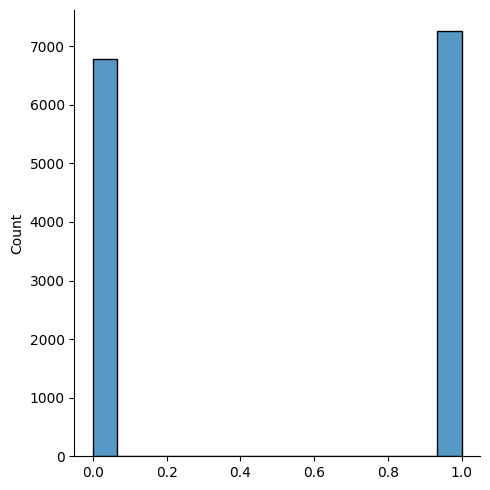

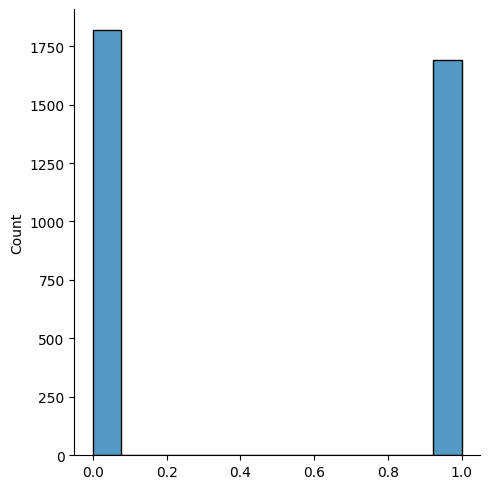

In [ ]:
sns.displot(Y_train, label="train")
sns.displot(Y_test, label="test")
plt.show()

# 4. Modelling

## 4.1 Definition

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(X_train.shape[-1], activation="relu"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.Dense(100),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.Dense(1, activation="sigmoid")
], name="mushroom_model")

## 4.2 Compilation

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", "precision", "recall"]
)

## 4.3 Fit

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                patience=10,
                                                                restore_best_weights=True,
                                                                min_delta=0.001
                                                                ),
                               tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1)
                               ])

Epoch 1/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.8155e-07 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.7063e-07 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.6572e-07 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.5173e-07 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.1219e-07 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.2288e-07 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.2821e-07 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.4050e-07 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/100
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.7286e-07 - precision: 1.0000 - recall: 1.0

## 4.4 Get model summary

In [ ]:
model.summary()

Model: "mushroom_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 43)                  │           1,892 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │           4,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,481 (193.29 KB)

 Trainable params: 16,493 (64.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,988 (128.86 KB)

## 4.4 Plot loss curves

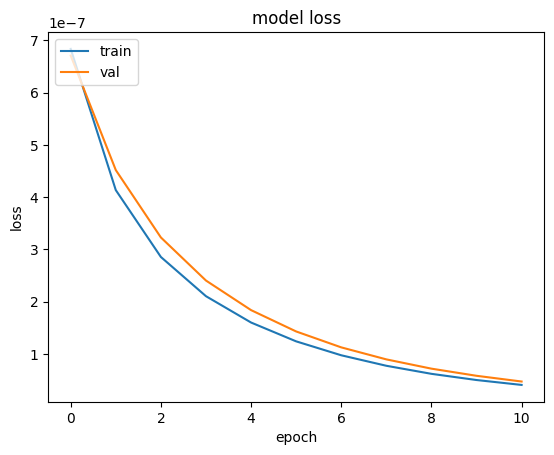

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

## 4.5 Plot the loss for test set

In [ ]:
Y_pred = []
for x in tqdm(X_test):
    Y_pred.append(model.predict(tf.reshape(x, (1,43)), verbose=0))

100%|██████████| 3510/3510 [04:49<00:00, 12.12it/s]


In [ ]:
Y_pred_binary = [int(y.squeeze()) for y in Y_pred]

In [ ]:
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y_pred_binary, Y_test), tf.float32))

# If you want to calculate using tf.metrics.Accuracy
accuracy_metric = tf.keras.metrics.Accuracy()
accuracy_metric.update_state(Y_test, Y_pred_binary)
accuracy_value = accuracy_metric.result().numpy()

print(f"Accuracy (calculated manually): {accuracy.numpy()}")
print(f"Accuracy (using tf.metrics.Accuracy): {accuracy_value}")

Accuracy (calculated manually): 0.9179487228393555
Accuracy (using tf.metrics.Accuracy): 0.9179487228393555


## 4.6 Save model

In [ ]:
# Save a model to keras format
model.save("mushroom_model.keras")